In [27]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
df = pd.read_csv('/Users/bhavikmangla/Documents/mrm/CarData_PreProcessed.csv', index_col=False)

In [68]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'CarCompany'],
      dtype='object')

In [69]:
df.enginesize[:150].values

array([130, 130, 152, 109, 136, 136, 136, 136, 131, 131, 108, 108, 164,
       164, 164, 209, 209, 209,  61,  90,  90,  90,  90,  98,  90,  90,
        90,  98, 122, 156,  92,  92,  79,  92,  92,  92,  92, 110, 110,
       110, 110, 110, 110, 111,  90,  90, 119, 258, 258, 326,  91,  91,
        91,  91,  91,  70,  70,  70,  80, 122, 122, 122, 122, 122, 122,
       140, 134, 183, 183, 183, 183, 234, 234, 308, 304, 140,  92,  92,
        92,  98, 110, 122, 156, 156, 156, 122, 122, 110, 110,  97, 103,
        97,  97,  97,  97,  97,  97,  97,  97, 120, 120, 181, 181, 181,
       181, 181, 181, 120, 152, 120, 152, 120, 152, 120, 152, 120, 152,
       134,  90,  98,  90,  90,  98, 122, 156, 151, 194, 194, 194, 203,
       132, 132, 121, 121, 121, 121, 121, 121,  97, 108, 108, 108, 108,
       108, 108, 108, 108, 108, 108, 108])

In [132]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,0,0,0,0,0,0,88.6,168.8,...,0,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,3,0,0,0,0,0,0,88.6,168.8,...,0,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,1,0,0,0,1,0,0,94.5,171.2,...,0,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,4,2,0,0,1,2,1,0,99.8,176.6,...,0,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,2,0,0,1,2,2,0,99.4,176.6,...,0,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [95]:
df.shape

(205, 26)

# Data Visualization

In [111]:
df.loc[:149,['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','cylindernumber','enginetype','enginesize','wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']].values

array([[3.0e+00, 0.0e+00, 0.0e+00, ..., 5.0e+03, 2.1e+01, 2.7e+01],
       [3.0e+00, 0.0e+00, 0.0e+00, ..., 5.0e+03, 2.1e+01, 2.7e+01],
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 5.0e+03, 1.9e+01, 2.6e+01],
       ...,
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 5.2e+03, 2.5e+01, 3.1e+01],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 4.8e+03, 2.3e+01, 2.9e+01],
       [0.0e+00, 0.0e+00, 1.0e+00, ..., 4.8e+03, 2.3e+01, 2.3e+01]])

# Splitting data into test and train

In [153]:
x_train, x_test, y_train, y_test = df.loc[:169,['fuelsystem','symboling','CarCompany','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','cylindernumber','enginetype','enginesize','wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']].values,df.loc[170:,['fuelsystem','symboling','CarCompany','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','cylindernumber','enginetype','enginesize','wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']].values,df.price[:170].values,df.price[170:].values
x_train = np.reshape(x_train, (-1,24))
x_test = np.reshape(x_test, (-1,24))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))
for i in range(24):
    x_train[i] = (x_train[i] - x_train[i].min())/(x_train[i].max()-x_train[i].min())
#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

print(x_train)

Train - Predictors shape (170, 24)
Test - Predictors shape (35, 24)
Train - Target shape (170, 1)
Test - Target shape (35, 1)
[[0.0e+00 6.0e-04 0.0e+00 ... 1.0e+00 4.2e-03 5.4e-03]
 [0.0e+00 6.0e-04 0.0e+00 ... 1.0e+00 4.2e-03 5.4e-03]
 [0.0e+00 2.0e-04 0.0e+00 ... 1.0e+00 3.8e-03 5.2e-03]
 ...
 [0.0e+00 2.0e+00 2.2e+01 ... 4.8e+03 2.4e+01 3.0e+01]
 [0.0e+00 2.0e+00 2.2e+01 ... 4.8e+03 2.4e+01 3.0e+01]
 [0.0e+00 2.0e+00 2.2e+01 ... 4.8e+03 2.4e+01 3.0e+01]]


# Linear Regression using Scikit

This is the linear regression model implemented using scikit library. 

In [144]:
cls = linear_model.LinearRegression()
#Fit method is used for fitting your training data into the model
cls.fit(x_train,y_train)

LinearRegression()

In [145]:
prediction = cls.predict(x_test)

In [146]:
#Parameters used for the model 
cls.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [147]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [[-3.50392868e+02 -3.65108780e+01 -1.07033393e+02  1.41937490e+04
   1.01815220e+03  6.08926438e+01  6.10098735e+01  2.14882057e+02
   1.80074431e+04  1.78421952e+03 -9.75601749e+02  5.70150936e+01
   1.90052279e+02 -6.30181259e+01 -1.15443208e+02 -2.30770412e+02
   4.88231157e+00  1.36337217e+03 -3.41569213e+03 -8.10536650e+02
   7.27198388e+00  2.50970603e-01 -1.49571105e+02  1.82241184e+02]]


In [148]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model [17381.13477011]


In [150]:
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))

Mean Square Error 8483321.511024365


In [151]:
print('Model R^2 Square value', metrics.r2_score(y_test, prediction))

Model R^2 Square value 0.5331886170343664


ValueError: x and y must be the same size

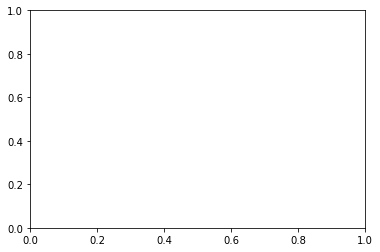

In [88]:
#Model Regression line on test set
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('Engine size',)
plt.ylabel('Horse Power')
plt.title('Linear Regression')

# Linear Regression using normal equaltions

In [136]:
def theta_calc(x_train, y_train):
    #Initializing all variables
    n_data = x_train.shape[0]
    bias = np.ones((n_data,1))
  
    x_train_b = np.append(bias, x_train, axis=1)
    #
    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)
    return theta 
    #

In [137]:
def predict_func(slope,intercept,x_test):
    #
    pred = []
    n_data = x_test.shape[0]
    for i in range(n_data):
        pred.append((slope * x_test[i]) + intercept)
        
    return pred

In [138]:
def mse_calc(prediction, y_test):
    #
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error

In [139]:
def rsq(prediction, y_test):
    #
    total_data = len(prediction)
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    #
    r2 = 1 - (res_err / tot_err)
    return r2

In [140]:
#Finding optimal theta value using normal equations
theta = theta_calc(x_train, y_train)
intercept = theta[0]
slope = theta[1]
print('Intercept of the model', intercept)
print('Slope of the model', theta[1:])
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)
#MSE calculation
error =  mse_calc(prediction, y_test)
print('Mean squared error of the model', error)
#R-square calculation
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

Intercept of the model [17381.13477012]
Slope of the model [[-3.50392868e+02]
 [-3.65108780e+01]
 [-1.07033393e+02]
 [ 1.41937490e+04]
 [ 1.01815220e+03]
 [ 6.08926438e+01]
 [ 6.10098735e+01]
 [ 2.14882057e+02]
 [ 1.80074431e+04]
 [ 1.78421952e+03]
 [-9.75601749e+02]
 [ 5.70150936e+01]
 [ 1.90052279e+02]
 [-6.30181259e+01]
 [-1.15443208e+02]
 [-2.30770412e+02]
 [ 4.88231157e+00]
 [ 1.36337217e+03]
 [-3.41569213e+03]
 [-8.10536650e+02]
 [ 7.27198388e+00]
 [ 2.50970603e-01]
 [-1.49571105e+02]
 [ 1.82241184e+02]]
Mean squared error of the model 4041729798977.404
R squared value -222403.0989820072


In [58]:
y_test.shape

(55, 1)

Text(0, 0.5, 'Residual')

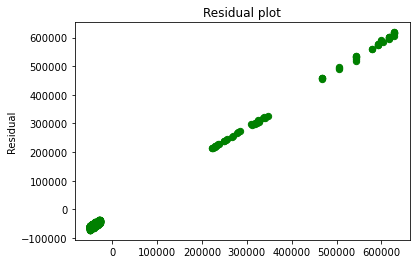

In [12]:
#Residual plot
plt.scatter(prediction, prediction - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

# Linear Regression using Gradient Descent

In [141]:
def mse(slope, intercept, x_train, y_train):
    tot_error = 0
    pred = []
    for i in range(len(x_train)):
        #calculating total error. It follows the formula y=mx+c
        #m is the slope and c is the intercept
        pred.append(((slope*x_train[i]) + intercept))
        tot_error += (y_train[i] - ((slope*x_train[i]) + intercept)) ** 2
        
    error = tot_error / float(len(x_train))
    return error, pred

In [142]:
#gradient descent 
def grad_descent(s_slope, s_intercept, l_rate, iter_val, x_train, y_train):
    
    for i in range(iter_val):
        int_slope = 0
        int_intercept = 0
        n_pt = float(len(x_train))
        
        
        for i in range(len(x_train)):
            int_intercept += - (2/n_pt) * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            int_slope += - (2/n_pt) * x_train[i] * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            
        final_slope = s_slope - (l_rate * int_slope)
        final_intercept = s_intercept - (l_rate * int_intercept)
        s_slope = final_slope
        s_intercept = final_intercept
        
        
    return  s_slope, s_intercept

In [143]:
#defining slope and intercept value as 0 
learning_rate = 0.000001
start_slope = 0
start_intercept = 0
iteration = 1000
#intial run
grad_slope, grad_intercept = grad_descent(start_slope, start_intercept, learning_rate, iteration, x_train, y_train)
final_e_value, prediction = mse(grad_slope, grad_intercept, x_test, y_test)
#
print('Slope of the model', grad_slope)
print('Intercept of the model', grad_intercept)
print('Error value of the model', final_e_value)
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)
print(prediction,"\n\n")
print(y_test)


/var/folders/0r/m1xvx8c11c90xz17cp51blf00000gn/T/ipykernel_6189/4105773154.py:12: RuntimeWarning: overflow encountered in add
  int_slope += - (2/n_pt) * x_train[i] * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
/var/folders/0r/m1xvx8c11c90xz17cp51blf00000gn/T/ipykernel_6189/4105773154.py:14: RuntimeWarning: invalid value encountered in subtract
  final_slope = s_slope - (l_rate * int_slope)


Slope of the model [ 36.46076131  20.17807365 237.23322767   2.87388528   4.91053318
  11.25851877  40.66731572  11.00363843   1.21814831  23.72848936
  48.35736708 107.11058206 130.08609855  74.40372675 193.36335803
 232.02415259          nan  73.2014964   69.50477036 204.51733754
 129.0822317           nan 285.34698528 285.40410107]
Intercept of the model [26.33981261 26.38005178 23.43897581 26.39582833 26.39531464 26.39090482
 26.33292071 26.38920979 26.39604321 26.38588368 26.30014259  4.1452782
  5.83433264  4.79722396  7.51298288  9.25503521         nan 26.18607621
 26.20214943 24.56927111  5.06133363         nan 18.89964632 16.64226162]
Error value of the model [2.01382667e+08 2.02237471e+08 7.63876725e+07 2.02262660e+08
 2.02236546e+08 2.02040016e+08 2.00156233e+08 2.02166426e+08
 2.02274496e+08 2.02092793e+08 2.00073028e+08 1.00180607e+07
 1.48763284e+07 1.45820626e+07 1.70903595e+07 1.86765123e+07
            nan 1.95541759e+08 1.96095323e+08 1.47304924e+08
 1.07740206e+07   